<a href="https://colab.research.google.com/github/SpectraGbes/Spectragbes/blob/main/Henry(Air_Quality_in_Dar_es_Salaam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries here
import inspect
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg


In [2]:
df = pd.read_csv("march_2018_sensor_data_archive.csv")
df

,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value
0,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...
1,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...
2,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...
3,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...
4,32;DHT22;11;-6.818;39.285;2018-03-01T00:00:52....
...,...
127911,23;SDS011;11;-6.818;39.285;2018-03-31T23:58:49...
127912,33;SDS011;11;-6.818;39.285;2018-03-31T23:59:13...
127913,33;SDS011;11;-6.818;39.285;2018-03-31T23:59:13...
127914,34;DHT22;11;-6.818;39.285;2018-03-31T23:59:14....


In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127916 entries, 0 to 127915
Data columns (total 1 columns):
 #   Column                                                             Non-Null Count   Dtype 
---  ------                                                             --------------   ----- 
 0   sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value  127916 non-null  object
dtypes: object(1)
memory usage: 999.5+ KB


,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value
0,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...
1,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...
2,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...
3,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...
4,32;DHT22;11;-6.818;39.285;2018-03-01T00:00:52....


In [4]:
new_cols = df["sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value"].str.split(";", expand=True)
new_cols

,0,1,2,3,4,5,6,7
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90
1,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13
2,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20
4,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90
...,...,...,...,...,...,...,...,...
127911,23,SDS011,11,-6.818,39.285,2018-03-31T23:58:49.319902+00:00,P1,29.90
127912,33,SDS011,11,-6.818,39.285,2018-03-31T23:59:13.053757+00:00,P1,22.30
127913,33,SDS011,11,-6.818,39.285,2018-03-31T23:59:13.053757+00:00,P2,12.50
127914,34,DHT22,11,-6.818,39.285,2018-03-31T23:59:14.859934+00:00,humidity,72.70


In [5]:
df[["sensor_id", "sensor_type", "location", "lat", "lon", "timestamp", "value_type", "value"]] = new_cols
df.head()


,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90
1,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13
2,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73
3,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20
4,32;DHT22;11;-6.818;39.285;2018-03-01T00:00:52....,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90


In [6]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127916 entries, 0 to 127915
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count   Dtype 
---  ------                                                             --------------   ----- 
 0   sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value  127916 non-null  object
 1   sensor_id                                                          127916 non-null  object
 2   sensor_type                                                        127916 non-null  object
 3   location                                                           127916 non-null  object
 4   lat                                                                127916 non-null  object
 5   lon                                                                127916 non-null  object
 6   timestamp                                                          127916 non-null  object
 7   value_type           

,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90
1,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13
2,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73
3,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20
4,32;DHT22;11;-6.818;39.285;2018-03-01T00:00:52....,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90


In [7]:
columns_to_drop = ["sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value"]
columns_to_drop

['sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value']

In [8]:
df["sensor_id"] = df["sensor_id"].astype(int)
df["location"] = df["location"].astype(int)
df["lat"] = df["lat"].astype(float)
df["lon'"] = df["lon"].astype(float)
df["value"] = df["value"].astype(float)

In [9]:
df.head()

,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
1,33;SDS011;11;-6.818;39.285;2018-03-01T00:00:35...,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13,39.285
2,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73,39.285
3,31;SDS011;11;-6.818;39.285;2018-03-01T00:00:51...,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
4,32;DHT22;11;-6.818;39.285;2018-03-01T00:00:52....,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90,39.285


In [10]:
df.drop(columns=columns_to_drop, inplace=True, axis=1)

In [11]:
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
1,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13,39.285
2,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
4,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90,39.285


In [12]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127916 entries, 0 to 127915
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    127916 non-null  int64  
 1   sensor_type  127916 non-null  object 
 2   location     127916 non-null  int64  
 3   lat          127916 non-null  float64
 4   lon          127916 non-null  object 
 5   timestamp    127916 non-null  object 
 6   value_type   127916 non-null  object 
 7   value        127916 non-null  float64
 8   lon'         127916 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
1,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13,39.285
2,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
4,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90,39.285


In [13]:
df = pd.DataFrame(df)
df

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
1,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P1,4.13,39.285
2,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P1,2.73,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
4,32,DHT22,11,-6.818,39.285,2018-03-01T00:00:52.477858+00:00,humidity,76.90,39.285
...,...,...,...,...,...,...,...,...,...
127911,23,SDS011,11,-6.818,39.285,2018-03-31T23:58:49.319902+00:00,P1,29.90,39.285
127912,33,SDS011,11,-6.818,39.285,2018-03-31T23:59:13.053757+00:00,P1,22.30,39.285
127913,33,SDS011,11,-6.818,39.285,2018-03-31T23:59:13.053757+00:00,P2,12.50,39.285
127914,34,DHT22,11,-6.818,39.285,2018-03-31T23:59:14.859934+00:00,humidity,72.70,39.285


In [14]:
new_df = df[(df["value_type"] == "P2") & (df["location"] == 11)]
new_df

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
7,23,SDS011,11,-6.818,39.285,2018-03-01T00:01:51.600565+00:00,P2,2.20,39.285
8,29,SDS011,11,-6.818,39.285,2018-03-01T00:01:56.037645+00:00,P2,2.23,39.285
12,33,SDS011,11,-6.818,39.285,2018-03-01T00:03:05.850245+00:00,P2,2.03,39.285
...,...,...,...,...,...,...,...,...,...
127901,33,SDS011,11,-6.818,39.285,2018-03-31T23:54:16.381490+00:00,P2,12.80,39.285
127904,23,SDS011,11,-6.818,39.285,2018-03-31T23:56:19.809784+00:00,P2,13.37,39.285
127909,33,SDS011,11,-6.818,39.285,2018-03-31T23:56:47.057768+00:00,P2,13.13,39.285
127910,23,SDS011,11,-6.818,39.285,2018-03-31T23:58:49.319902+00:00,P2,14.70,39.285


In [15]:
new_df = new_df.drop_duplicates()
new_df

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01T00:00:35.546230+00:00,P2,1.90,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01T00:00:51.112921+00:00,P2,2.20,39.285
7,23,SDS011,11,-6.818,39.285,2018-03-01T00:01:51.600565+00:00,P2,2.20,39.285
8,29,SDS011,11,-6.818,39.285,2018-03-01T00:01:56.037645+00:00,P2,2.23,39.285
12,33,SDS011,11,-6.818,39.285,2018-03-01T00:03:05.850245+00:00,P2,2.03,39.285
...,...,...,...,...,...,...,...,...,...
127901,33,SDS011,11,-6.818,39.285,2018-03-31T23:54:16.381490+00:00,P2,12.80,39.285
127904,23,SDS011,11,-6.818,39.285,2018-03-31T23:56:19.809784+00:00,P2,13.37,39.285
127909,33,SDS011,11,-6.818,39.285,2018-03-31T23:56:47.057768+00:00,P2,13.13,39.285
127910,23,SDS011,11,-6.818,39.285,2018-03-31T23:58:49.319902+00:00,P2,14.70,39.285


In [16]:
new_df["timestamp"] = pd.to_datetime(new_df["timestamp"])
new_df["timestamp"].head()

,timestamp
0,2018-03-01 00:00:35.546230+00:00
3,2018-03-01 00:00:51.112921+00:00
7,2018-03-01 00:01:51.600565+00:00
8,2018-03-01 00:01:56.037645+00:00
12,2018-03-01 00:03:05.850245+00:00


In [17]:
new_df["timestamp"] = new_df["timestamp"].dt.tz_convert("Africa/Dar_es_Salaam")
new_df["timestamp"].head()

,timestamp
0,2018-03-01 03:00:35.546230+03:00
3,2018-03-01 03:00:51.112921+03:00
7,2018-03-01 03:01:51.600565+03:00
8,2018-03-01 03:01:56.037645+03:00
12,2018-03-01 03:03:05.850245+03:00


In [18]:
new_df = new_df[new_df["value"] < 100]
new_df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value,lon'
0,33,SDS011,11,-6.818,39.285,2018-03-01 03:00:35.546230+03:00,P2,1.90,39.285
3,31,SDS011,11,-6.818,39.285,2018-03-01 03:00:51.112921+03:00,P2,2.20,39.285
7,23,SDS011,11,-6.818,39.285,2018-03-01 03:01:51.600565+03:00,P2,2.20,39.285
8,29,SDS011,11,-6.818,39.285,2018-03-01 03:01:56.037645+03:00,P2,2.23,39.285
12,33,SDS011,11,-6.818,39.285,2018-03-01 03:03:05.850245+03:00,P2,2.03,39.285


In [19]:
new_df = new_df[["timestamp", "value"]]
new_df = new_df.rename(columns={"value": "P2"})

In [20]:
new_df = new_df.set_index("timestamp")
new_df.head()

,P2
timestamp,
2018-03-01 03:00:35.546230+03:00,1.90
2018-03-01 03:00:51.112921+03:00,2.20
2018-03-01 03:01:51.600565+03:00,2.20
2018-03-01 03:01:56.037645+03:00,2.23
2018-03-01 03:03:05.850245+03:00,2.03


In [21]:
new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")
new_df.head()

<ipython-input-21-9f642358e99a>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")
<ipython-input-21-9f642358e99a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")


,P2
timestamp,
2018-03-01 03:00:00+03:00,2.460316
2018-03-01 04:00:00+03:00,2.790814
2018-03-01 05:00:00+03:00,2.921134
2018-03-01 06:00:00+03:00,3.723333
2018-03-01 07:00:00+03:00,4.013854


In [22]:
new_df = pd.DataFrame(new_df)
new_df.head()

,P2
timestamp,
2018-03-01 03:00:00+03:00,2.460316
2018-03-01 04:00:00+03:00,2.790814
2018-03-01 05:00:00+03:00,2.921134
2018-03-01 06:00:00+03:00,3.723333
2018-03-01 07:00:00+03:00,4.013854


Text(0.5, 1.0, 'Dar es Salaam PM2.5 Levels')

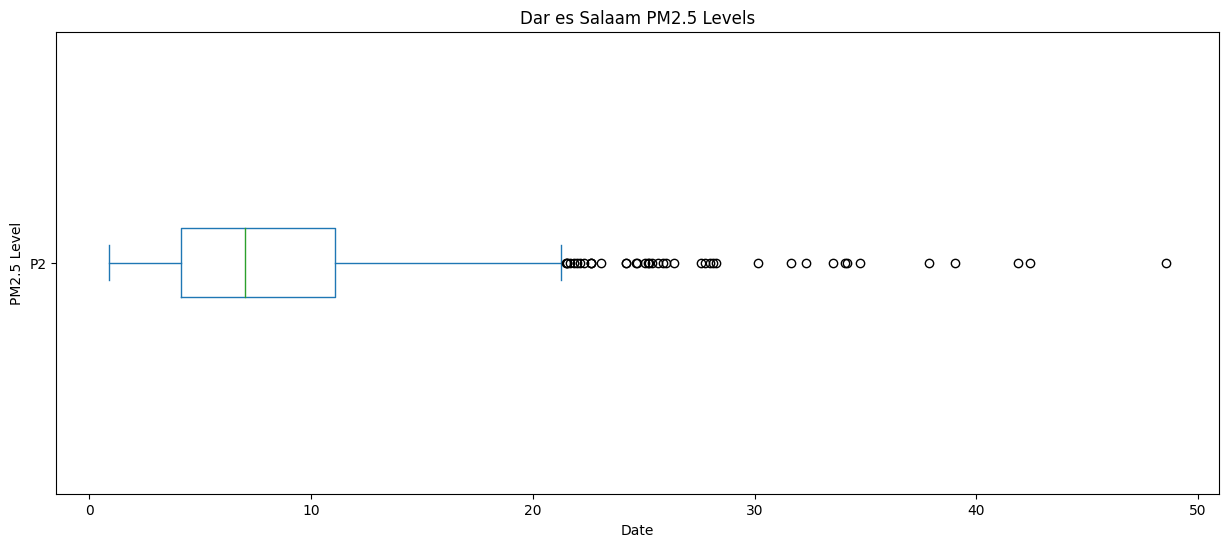

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
new_df["P2"].plot(kind="box", vert=False, title="Distribution of PM2.5 Reading", ax=ax)
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('Dar es Salaam PM2.5 Levels')

In [24]:
new_df_series = pd.Series(new_df["P2"])
new_df_series.head()

,P2
timestamp,
2018-03-01 03:00:00+03:00,2.460316
2018-03-01 04:00:00+03:00,2.790814
2018-03-01 05:00:00+03:00,2.921134
2018-03-01 06:00:00+03:00,3.723333
2018-03-01 07:00:00+03:00,4.013854


In [25]:
rolling_avg = new_df_series.rolling(window=168, min_periods=1).mean()
rolling_avg.head()

,P2
timestamp,
2018-03-01 03:00:00+03:00,2.460316
2018-03-01 04:00:00+03:00,2.625565
2018-03-01 05:00:00+03:00,2.724088
2018-03-01 06:00:00+03:00,2.973899
2018-03-01 07:00:00+03:00,3.181890


Text(0.5, 1.0, 'Dar es Salaam PM2.5 Levels, 7-Day Rolling Average')

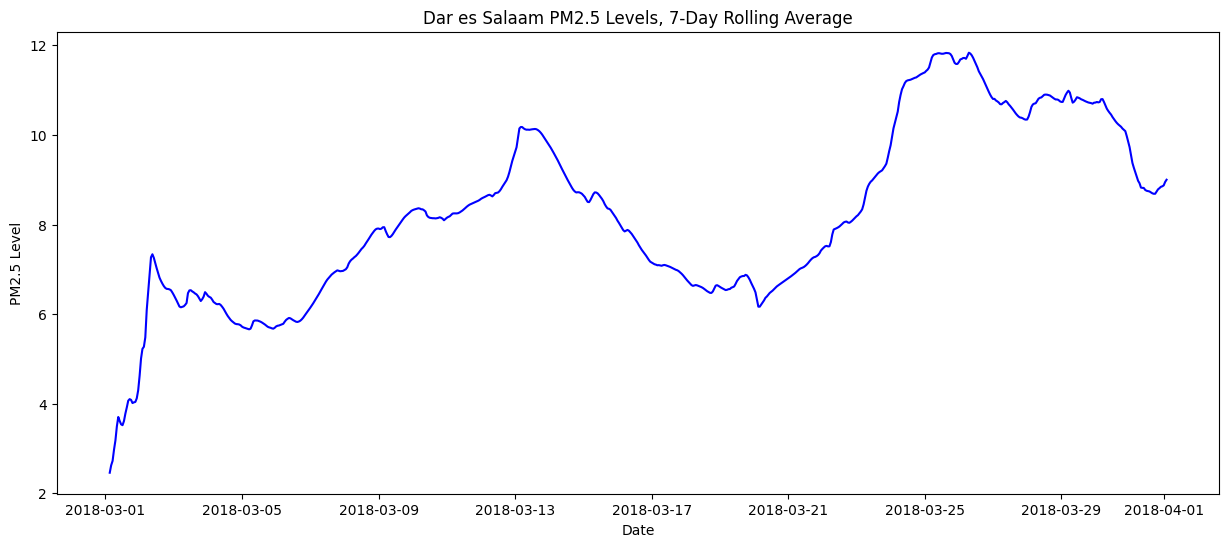

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(rolling_avg, color='blue', linestyle='-')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('Dar es Salaam PM2.5 Levels, 7-Day Rolling Average')

In [27]:
new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")
new_df.head()

<ipython-input-27-9f642358e99a>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")
<ipython-input-27-9f642358e99a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = new_df["P2"].resample("1H").mean().fillna(method="ffill")


,P2
timestamp,
2018-03-01 03:00:00+03:00,2.460316
2018-03-01 04:00:00+03:00,2.790814
2018-03-01 05:00:00+03:00,2.921134
2018-03-01 06:00:00+03:00,3.723333
2018-03-01 07:00:00+03:00,4.013854


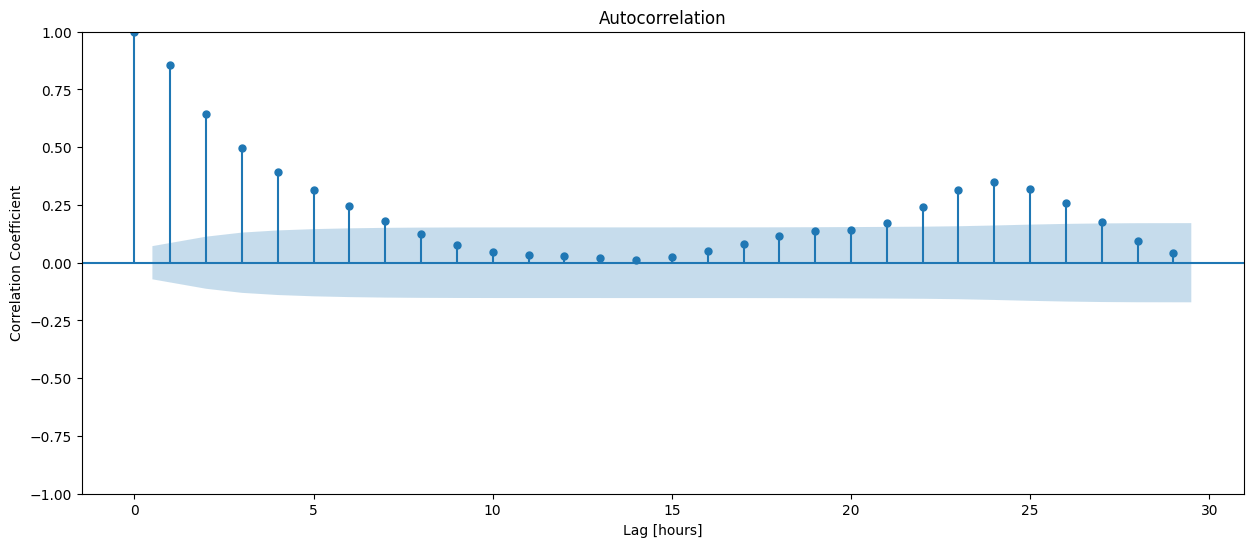

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(new_df, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

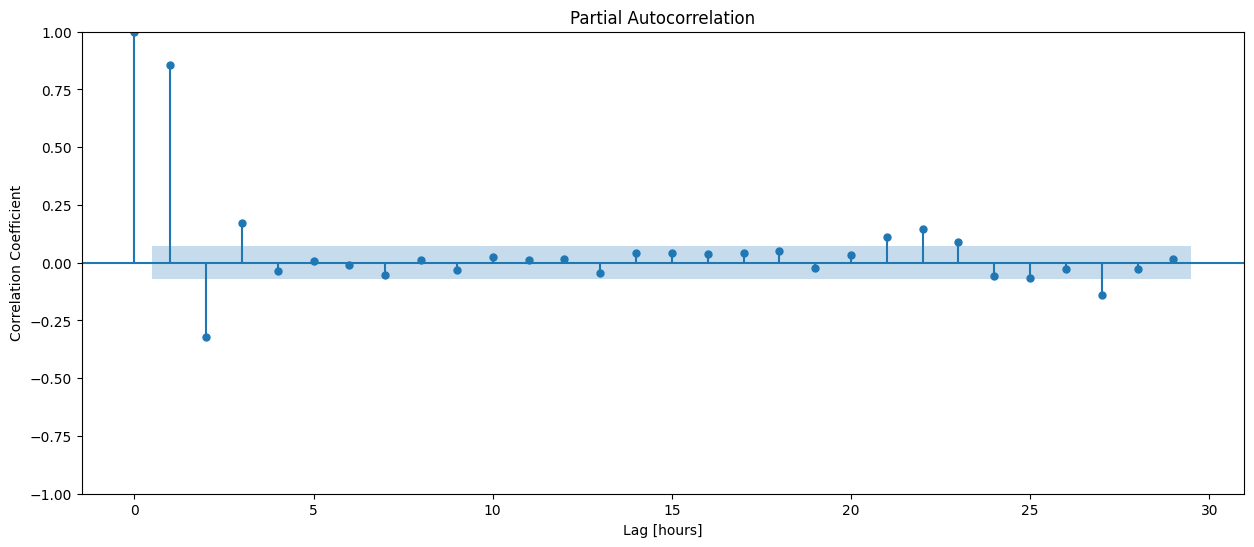

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(new_df, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

In [30]:
cutoff_test = int(len(new_df) * 0.9)
y_train = new_df.iloc[:cutoff_test]
y_test = new_df.iloc[cutoff_test:]
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (669,)
y_test shape: (75,)


In [31]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", y_train_mean)
print("Baseline MAE:", mae_baseline)

Mean P2 Reading: 8.460962223299187
Baseline MAE: 4.50734023142268


In [32]:
# Create range to test different lags
p_params = range(1, 31)

# Create empty list to hold mean absolute error scores
maes = []

# Iterate through all values of p in `p_params`
for p in p_params:
    # Build model
    model = AutoReg(y_train, lags=p).fit()

    # Make predictions on training data, dropping null values caused by lag
    y_pred = model.predict().dropna()

    # Calculate mean absolute error for training data vs predictions
    mae = mean_absolute_error(y_train.iloc[p:], y_pred)

    # Append `mae` to list `maes`
    maes.append(mae)

# Put list `maes` into Series with index `p_params`
mae_series = pd.Series(maes, name="mae", index=p_params)

# Inspect head of Series
mae_series.head()

,mae
1,1.809720
2,1.720970
3,1.727638
4,1.730636
5,1.732622


In [33]:
best_p = mae_series.idxmin()
best_model = sm.tsa.AutoReg(y_train, lags=best_p).fit()

In [34]:
y_train_resid = model.resid
y_train_resid.name = "residuals"
y_train_resid.head()

,residuals
timestamp,
2018-03-02 09:00:00+03:00,-6.568654
2018-03-02 10:00:00+03:00,-0.928190
2018-03-02 11:00:00+03:00,-2.230038
2018-03-02 12:00:00+03:00,-0.960300
2018-03-02 13:00:00+03:00,-1.321167


Text(0.5, 1.0, 'Best Model, Training Residuals')

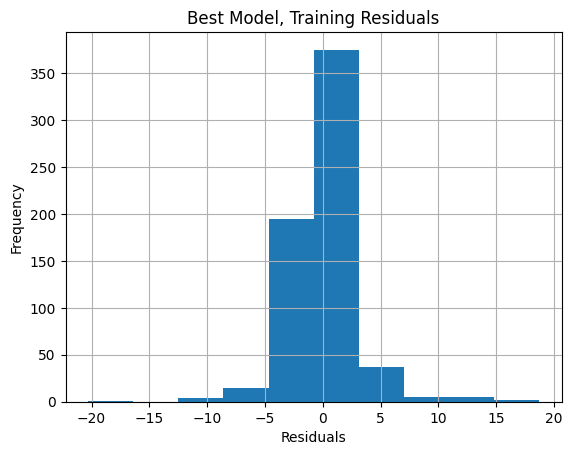

In [35]:
# Plot histogram of residuals
y_train_resid.hist()
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Best Model, Training Residuals")

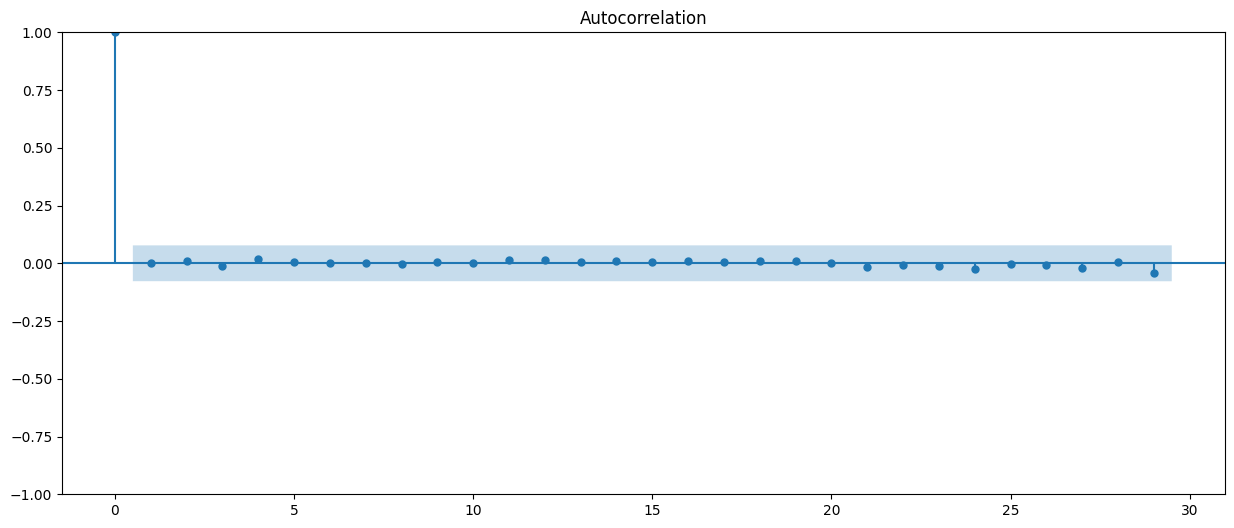

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid, ax=ax);

In [41]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = AutoReg(history, lags=best_p).fit()
    next_pred = model.forecast()
    # Use pd.concat instead of append
    y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
    history = pd.concat([history, y_test[next_pred.index]]) # Use pd.concat instead of append

y_pred_wfv.name = "prediction"
y_pred_wfv.index.name = "timestamp"
y_pred_wfv.head()

<ipython-input-41-afb354ee6884>:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_pred_wfv = pd.concat([y_pred_wfv, next_pred])


,prediction
timestamp,
2018-03-29 00:00:00+03:00,10.273424
2018-03-29 01:00:00+03:00,10.336912
2018-03-29 02:00:00+03:00,12.578725
2018-03-29 03:00:00+03:00,25.449396
2018-03-29 04:00:00+03:00,16.345622


In [42]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred_wfv": y_pred_wfv}
)
fig = px.line(df_pred_test, labels={"value": "PM2.5"})
fig.update_layout(
    title="Dar es Salaam, WFV Predictions",
    xaxis_title="Date",
    yaxis_title="PM2.5 Level",
)

fig.show()